(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

            

<>:69: SyntaxWarning: invalid escape sequence '\.'
<>:69: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayrin\AppData\Local\Temp\ipykernel_22860\1120925096.py:69: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


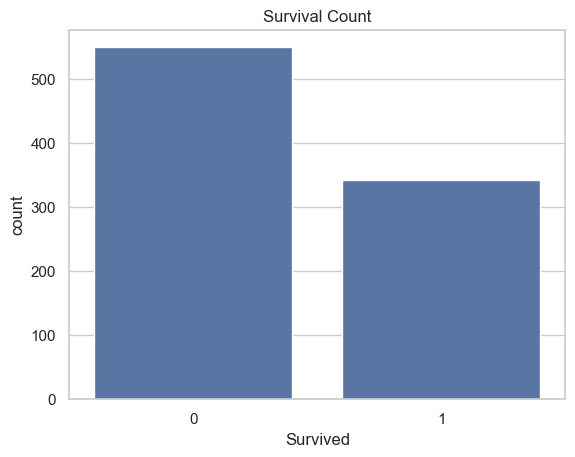

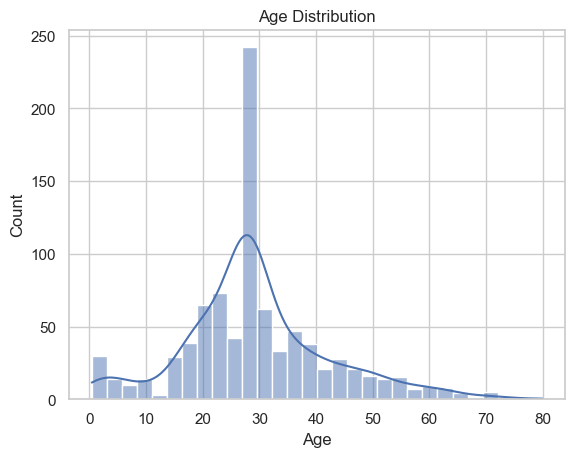

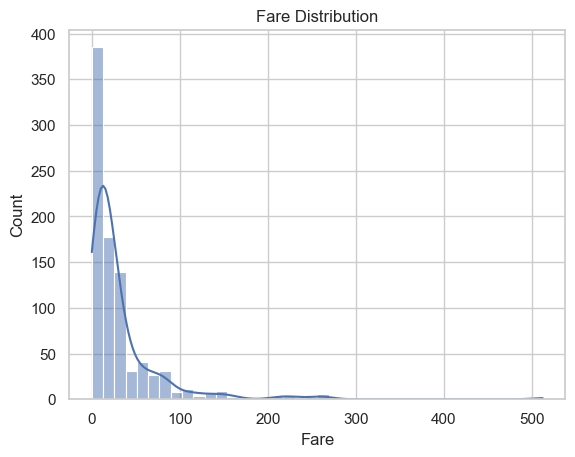

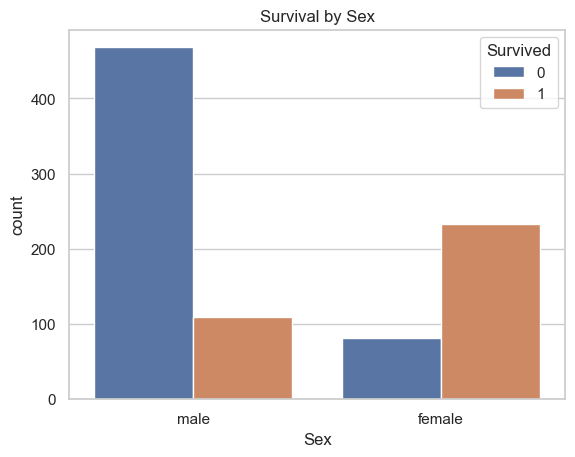

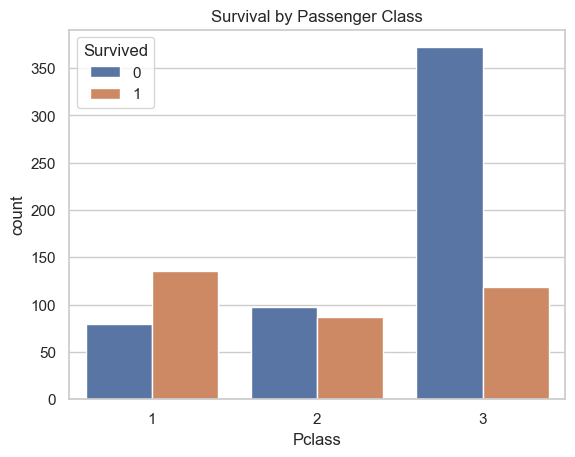

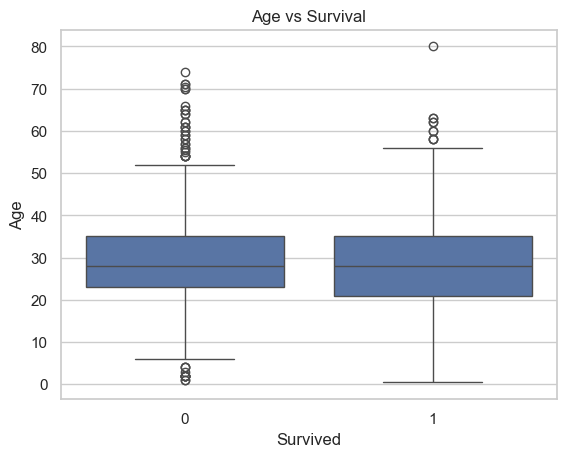

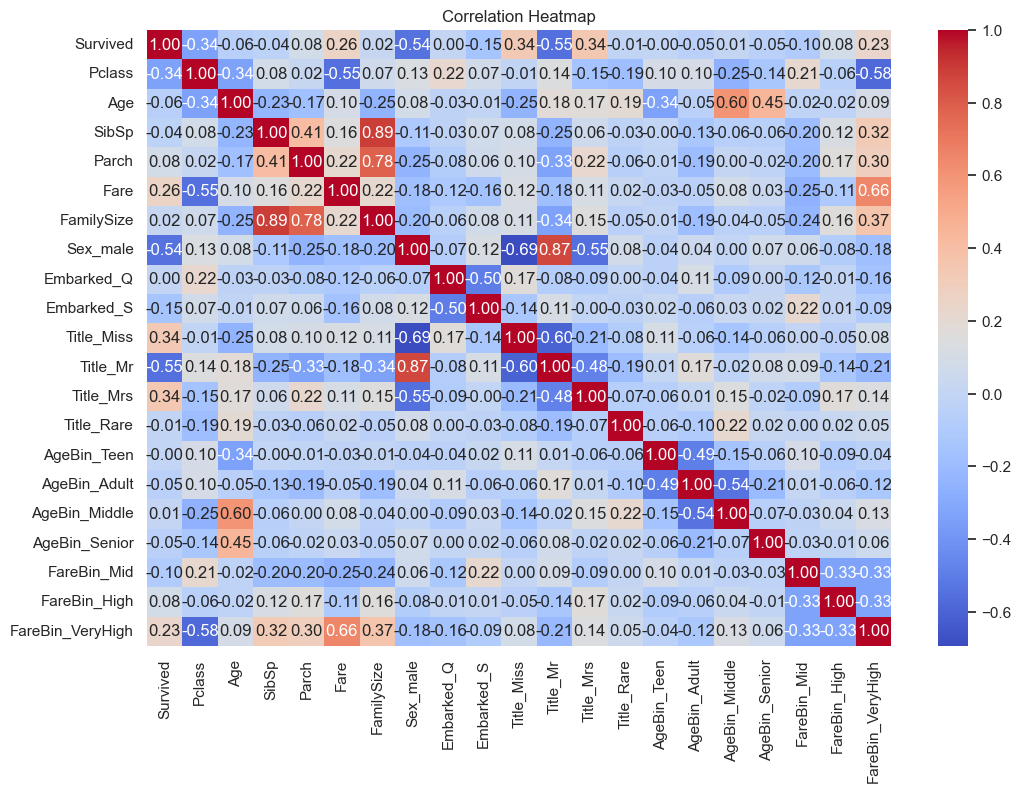

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set plot style
sns.set(style="whitegrid")

# 📂 Load data
df = pd.read_csv("../data/train.csv")

print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Ticket, Cabin, PassengerId, and Name (after extracting Title)
columns_to_drop = [col for col in ['Ticket', 'Cabin', 'PassengerId'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

# Survival count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Drop Name now
df.drop(columns=['Name'], inplace=True)

# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Age Binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], 
                      labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

# Fare Binning
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])

# Encode categoricals
df_encoded = pd.get_dummies(df, 
                             columns=['Sex', 'Embarked', 'Title', 'AgeBin', 'FareBin'], 
                             drop_first=True)

# Final correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
